# Data preparation and customer analytics

In [315]:
# Load required packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [316]:
# Load data
transactions = pd.read_excel('QVI_transaction_data.xlsx')
customers = pd.read_csv('QVI_purchase_behaviour.csv')

## Examining transactions data

In [317]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [318]:
transactions.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [319]:
transactions.describe()
# We can see that the max value for PROD_QTY is 200, which is large.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [320]:
transactions.describe(include='object')

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


---

### Checking outliers

In [ ]:
transactions.reset_index(drop=True, inplace=True)
print(transactions.PROD_QTY.unique())
# there are one unique value of 200, which is likely to be outliers
transactions[transactions.PROD_QTY == 200]

[  2   3   5   1   4 200]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
# checking the customer that made these transactions
transactions[transactions.LYLTY_CARD_NBR == 226000]
# it seems that the customer only made these two transactions, we can remove this customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
# remove the outliers
transactions = transactions[transactions.PROD_QTY != 200]
# or transactions = transactions[transactions.LYLTY_CARD_NBR != 226000]
transactions.reset_index(drop=True, inplace=True)
transactions.PROD_QTY.unique()

array([2, 3, 5, 1, 4], dtype=int64)

---

### Converting datetime

In [322]:
# Convert DATE column to datetime
transactions.DATE = pd.to_datetime(transactions.DATE, unit='D', origin=datetime.date(1899, 12, 30))

---

### Examining false entries

In [323]:
# create a list of individual words in PROD_NAME
words = []
for i in transactions.PROD_NAME:
    words.append(i.split())
# remove all words with digits and special characters such as '&' and '/'
for i in range(len(words)):
    words[i] = [word for word in words[i] if word.isalpha()]
# flatten the list
words = [word for sublist in words for word in sublist]
pd.Series(words).unique()

array(['Natural', 'Chip', 'Compny', 'CCs', 'Nacho', 'Cheese', 'Smiths',
       'Crinkle', 'Cut', 'Chips', 'Chicken', 'Thinly', 'Kettle',
       'Tortilla', 'Chili', 'Old', 'El', 'Paso', 'Salsa', 'Dip', 'Tomato',
       'Mild', 'Salt', 'Vinegar', 'Grain', 'Waves', 'Sweet', 'Chilli',
       'Doritos', 'Corn', 'Mexican', 'Jalapeno', 'Sour', 'Sensations',
       'Siracha', 'Lime', 'Twisties', 'WW', 'Thins', 'Tangy', 'Original',
       'Burger', 'Rings', 'NCC', 'Cream', 'Garden', 'Chives', 'Southern',
       'Cheezels', 'Box', 'Infzns', 'Crn', 'Crnchers', 'Gcamole', 'Sea',
       'And', 'Red', 'Rock', 'Deli', 'Thai', 'Pringles', 'Sthrn',
       'FriedChicken', 'BBQ', 'SR', 'Mzzrlla', 'Originl', 'saltd', 'Sp',
       'Truffle', 'Swt', 'Mexicana', 'French', 'OnionDip', 'ChipCo',
       'Hony', 'Soy', 'Dorito', 'Chp', 'Supreme', 'Roast', 'Mozzarella',
       'Basil', 'Pesto', 'Infuzions', 'SweetChili', 'PotatoMix',
       'Camembert', 'Fig', 'Smith', 'Mac', 'N', 'Honey',
       'Seasonedchicke

In [365]:
pd.Series(words).value_counts().head(20)

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22063
Original    21560
Cut         20754
Chip        18645
Salsa       18094
Chicken     15407
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
Vinegar     12402
Chilli      12389
Name: count, dtype: int64

As we can see from the previous two codel cells, there are salsa products in the dataset, which is not the item of interest.

In [325]:
# remove salsa products
transactions = transactions[~transactions.PROD_NAME.str.contains('Salsa')]
# check if salsa products are removed
transactions[transactions.PROD_NAME.str.contains('Salsa')].shape
# salsa products are removed since the shape is (0, 8) which means there are 0 rows and 8 columns

(0, 8)

---

### Missing dates

In [329]:
transactions.DATE.value_counts().sort_index()
# the data is from 2018-07-01 to 2019-06-30 with 364 days in total, indicates that there is one day missing

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: count, Length: 364, dtype: int64

In [330]:
# find the missing date
pd.date_range(start='2018-07-01', end='2019-06-30').difference(transactions.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [331]:
# double-check by zooming in on the date range from 2018-12-20 to 2019-01-01
transactions.DATE[(transactions.DATE >= '2018-12-20') & (transactions.DATE <= '2019-01-01')].value_counts().sort_index()
# there is indeed one day missing: 2018-12-25

DATE
2018-12-20    808
2018-12-21    781
2018-12-22    840
2018-12-23    853
2018-12-24    865
2018-12-26    700
2018-12-27    690
2018-12-28    669
2018-12-29    666
2018-12-30    686
2018-12-31    650
2019-01-01    634
Name: count, dtype: int64

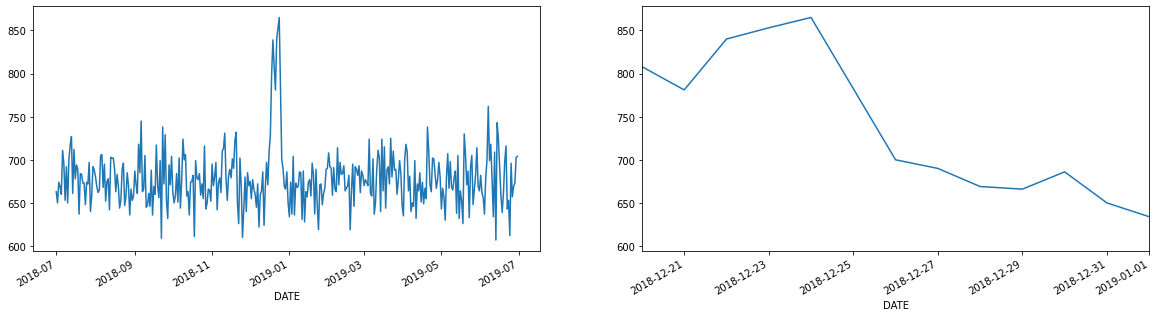

In [333]:
# create a plot containing two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# we can also check the missing date by creating a chart of the number of transactions over time
transactions.DATE.value_counts().sort_index().plot(ax=ax[0])

# zoom in on the missing date
transactions.DATE.value_counts().sort_index().plot(ax=ax[1])
ax[1].set_xlim(pd.Timestamp('2018-12-20'), pd.Timestamp('2019-01-01'))

plt.show()

Looking at the visualisations, we can see a decrease from 2018-12-24 to 2018-12-26 without any break in the line lead to 2018-12-26, indicates that there are no sale made on 2018-12-25, the Christmas day. The descriptive statistics created before this also confirm this statement.

---

### Creating new columns

In [334]:
# create a column of pack size for each product
transactions['PACK_SIZE'] = transactions.PROD_NAME.str.extract('(\d+)')
transactions.PACK_SIZE = transactions.PACK_SIZE.astype('int64')

In [335]:
# remove the last 4 characters from PROD_NAME
transactions.PROD_NAME = transactions.PROD_NAME.str[:-4]
transactions.PROD_NAME = transactions.PROD_NAME.str.strip()
transactions.PROD_NAME

0          Natural Chip        Compny SeaSalt
1                            CCs Nacho Cheese
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
246735     Kettle Sweet Chilli And Sour Cream
246736               Tostitos Splash Of  Lime
246737                       Doritos Mexicana
246738     Doritos Corn Chip Mexican Jalapeno
246739               Tostitos Splash Of  Lime
Name: PROD_NAME, Length: 246740, dtype: object

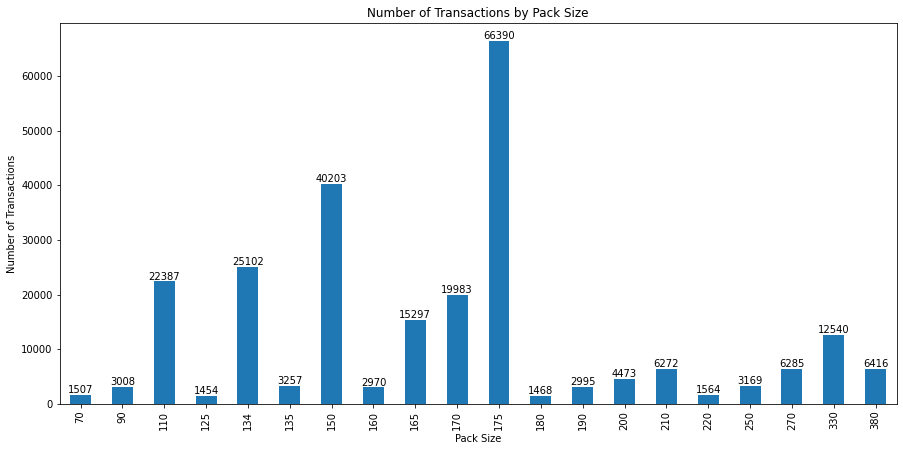

In [336]:
# create a chart showing the number of transactions by pack size.
ax = transactions.PACK_SIZE.value_counts().sort_index().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
ax.bar_label(ax.containers[0], label_type="edge")
plt.show()

Based on the chart, we can see that there are 4 most popular pack sizes. In order, 175g, 150g, 134g, 110g

In [357]:
transactions.PROD_NAME

0          Natural Chip        Compny SeaSalt
1                            CCs Nacho Cheese
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
246735     Kettle Sweet Chilli And Sour Cream
246736               Tostitos Splash Of  Lime
246737                       Doritos Mexicana
246738     Doritos Corn Chip Mexican Jalapeno
246739               Tostitos Splash Of  Lime
Name: PROD_NAME, Length: 246740, dtype: object

In [366]:
# create a column of brand name for each product
dict = {'RRD': 'Red Rock Deli', 'WW': 'Woolworths', 'NCC': 'Natural Chip Co', r'\bSmith\b': 'Smiths', 'Infzns': 'Infuzions', 'Snbts': 'Sunbites',
        'GrnWves':'Grain Waves'}
transactions.PROD_NAME.replace(dict, regex=True, inplace=True)
transactions['BRAND'] = transactions.PROD_NAME.str.split().str[0]
transactions.BRAND.value_counts()

BRAND
Kettle        41288
Smiths        30353
Pringles      25102
Doritos       22041
Red           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Grain          7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Dorito         3183
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64

In [367]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,Kettle
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175,Tostitos
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170,Doritos
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150,Doritos


## Examining customers data

In [368]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [369]:
customers.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [371]:
customers.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [372]:
customers.LYLTY_CARD_NBR.value_counts()
# There are 72637 unique customers, with no duplicates

LYLTY_CARD_NBR
1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: count, Length: 72637, dtype: int64

In [373]:
customers.LIFESTAGE.value_counts()
# There are 7 unique lifestages

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [374]:
customers.PREMIUM_CUSTOMER.value_counts()
# There are 3 unique premium customers

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

We can see that there are 3 unique premium customers and 7 unique lifestages, which means there are 21 unique customer segments

In [379]:
# merge the two datasets, keeping all the rows of transactions on the left and find rows with matching values from customers on the right
data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [380]:
# Check on any missing values
data.isnull().sum()
# There are 0 missing values

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [381]:
# Export the data to a csv file
data.to_csv('data.csv', index=False)

---

# Data Analysis

## Who spends the most on chips (total sales)? Their lifestages, and general purchasing behaviour?

In [401]:
sales_by_cus = data.groupby('LYLTY_CARD_NBR')[['TOT_SALES','LIFESTAGE', 'PREMIUM_CUSTOMER']].agg({'TOT_SALES': 'sum', 'LIFESTAGE': 'first', 'PREMIUM_CUSTOMER': 'first'}).sort_values(by='TOT_SALES', ascending=False)
# create a dataframe of total sales larger than 100 dollars
sales_larger_than_100 = sales_by_cus[sales_by_cus.TOT_SALES > 100]
sales_larger_than_100

,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,,
230078,138.6,OLDER FAMILIES,Budget
58361,124.8,YOUNG FAMILIES,Budget
63197,122.6,OLDER FAMILIES,Budget
162039,121.6,OLDER FAMILIES,Mainstream
179228,120.8,YOUNG FAMILIES,Budget
...,...,...,...
48155,100.7,OLDER SINGLES/COUPLES,Budget
209155,100.6,YOUNG FAMILIES,Budget
67109,100.4,RETIREES,Premium


Based on the table above, we can see that the highest customer spent 138.6 dollars in total and the customer is from the 'OLDER FAMILIES' lifestage and belongs to the 'Budget' customer segment.

In [406]:
sales_larger_than_100[['PREMIUM_CUSTOMER','LIFESTAGE']].value_counts().sort_index()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            11
                  OLDER SINGLES/COUPLES      5
                  RETIREES                   3
                  YOUNG FAMILIES            15
                  YOUNG SINGLES/COUPLES      2
Mainstream        MIDAGE SINGLES/COUPLES     1
                  OLDER FAMILIES             8
                  OLDER SINGLES/COUPLES      2
                  YOUNG FAMILIES             2
                  YOUNG SINGLES/COUPLES      4
Premium           MIDAGE SINGLES/COUPLES     3
                  OLDER FAMILIES             3
                  OLDER SINGLES/COUPLES      6
                  RETIREES                   1
                  YOUNG FAMILIES             4
                  YOUNG SINGLES/COUPLES      2
Name: count, dtype: int64

The two aforementioned keywords are also the second most frequent customer segment, with the highest being the 'YOUNG FAMILIES' and 'Budget' segment.

---

## How many customers are in each segment?

In [414]:
cus_by_seg = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].count()
# calculating the total of customers of each premium customer segment
cus_by_seg.groupby('PREMIUM_CUSTOMER').sum()

PREMIUM_CUSTOMER
Budget        86762
Mainstream    95043
Premium       64935
Name: LYLTY_CARD_NBR, dtype: int64

In [412]:
cus_by_seg.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            21514
Mainstream        RETIREES                  19970
                  YOUNG SINGLES/COUPLES     19544
Budget            YOUNG FAMILIES            17763
                  OLDER SINGLES/COUPLES     17172
Mainstream        OLDER SINGLES/COUPLES     17061
Premium           OLDER SINGLES/COUPLES     16560
Budget            RETIREES                  14225
Mainstream        OLDER FAMILIES            13241
Premium           RETIREES                  12236
Mainstream        YOUNG FAMILIES            11947
                  MIDAGE SINGLES/COUPLES    11095
Premium           YOUNG FAMILIES            10784
                  OLDER FAMILIES            10403
Budget            YOUNG SINGLES/COUPLES      8573
Premium           MIDAGE SINGLES/COUPLES     7612
                  YOUNG SINGLES/COUPLES      5852
Budget            MIDAGE SINGLES/COUPLES     4691
                  NEW FAMILIES               2824
Mainstrea

Based on the above descriptive statistics, some findings are:
- The top 3 segments are Budget - Older Families, Mainstream - Retirees, and Mainstream - Young Singles/Couples
- The bottom 3 segments are all NEW FAMILIES

---

## How many chips are bought per customer by segment?

In [415]:
chip_by_seg = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].sum()
# calculating the total of chips of each premium customer segment
chip_by_seg.groupby('PREMIUM_CUSTOMER').sum()

PREMIUM_CUSTOMER
Budget        165774
Mainstream    180780
Premium       123845
Name: PROD_QTY, dtype: int64

In [416]:
chip_by_seg.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            41853
Mainstream        RETIREES                  37677
                  YOUNG SINGLES/COUPLES     36225
Budget            YOUNG FAMILIES            34482
                  OLDER SINGLES/COUPLES     32883
Mainstream        OLDER SINGLES/COUPLES     32607
Premium           OLDER SINGLES/COUPLES     31695
Budget            RETIREES                  26932
Mainstream        OLDER FAMILIES            25804
Premium           RETIREES                  23266
Mainstream        YOUNG FAMILIES            23194
                  MIDAGE SINGLES/COUPLES    21213
Premium           YOUNG FAMILIES            20901
                  OLDER FAMILIES            20239
Budget            YOUNG SINGLES/COUPLES     15500
Premium           MIDAGE SINGLES/COUPLES    14400
                  YOUNG SINGLES/COUPLES     10575
Budget            MIDAGE SINGLES/COUPLES     8883
                  NEW FAMILIES               5241
Mainstrea

The same top 3 and bottom 3 statements are held for the number of chips as well.

---

## What's the average chip price by customer segment?

In [417]:
avg_chip_by_seg = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].mean()
avg_chip_by_seg

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    7.108442
                  NEW FAMILIES              7.297256
                  OLDER FAMILIES            7.291241
                  OLDER SINGLES/COUPLES     7.444305
                  RETIREES                  7.445786
                  YOUNG FAMILIES            7.302705
                  YOUNG SINGLES/COUPLES     6.663023
Mainstream        MIDAGE SINGLES/COUPLES    7.637156
                  NEW FAMILIES              7.313364
                  OLDER FAMILIES            7.281440
                  OLDER SINGLES/COUPLES     7.306049
                  RETIREES                  7.269352
                  YOUNG FAMILIES            7.226772
                  YOUNG SINGLES/COUPLES     7.551279
Premium           MIDAGE SINGLES/COUPLES    7.152371
                  NEW FAMILIES              7.231720
                  OLDER FAMILIES            7.232779
                  OLDER SINGLES/COUPLES     7.459997
     

Based on the descriptive statistics above:
- The range are around 6.66 to 7.63 dollars per segment.
- Overall, the average of chip sales in each segment is similar.

---

## The customer's total spend over the period

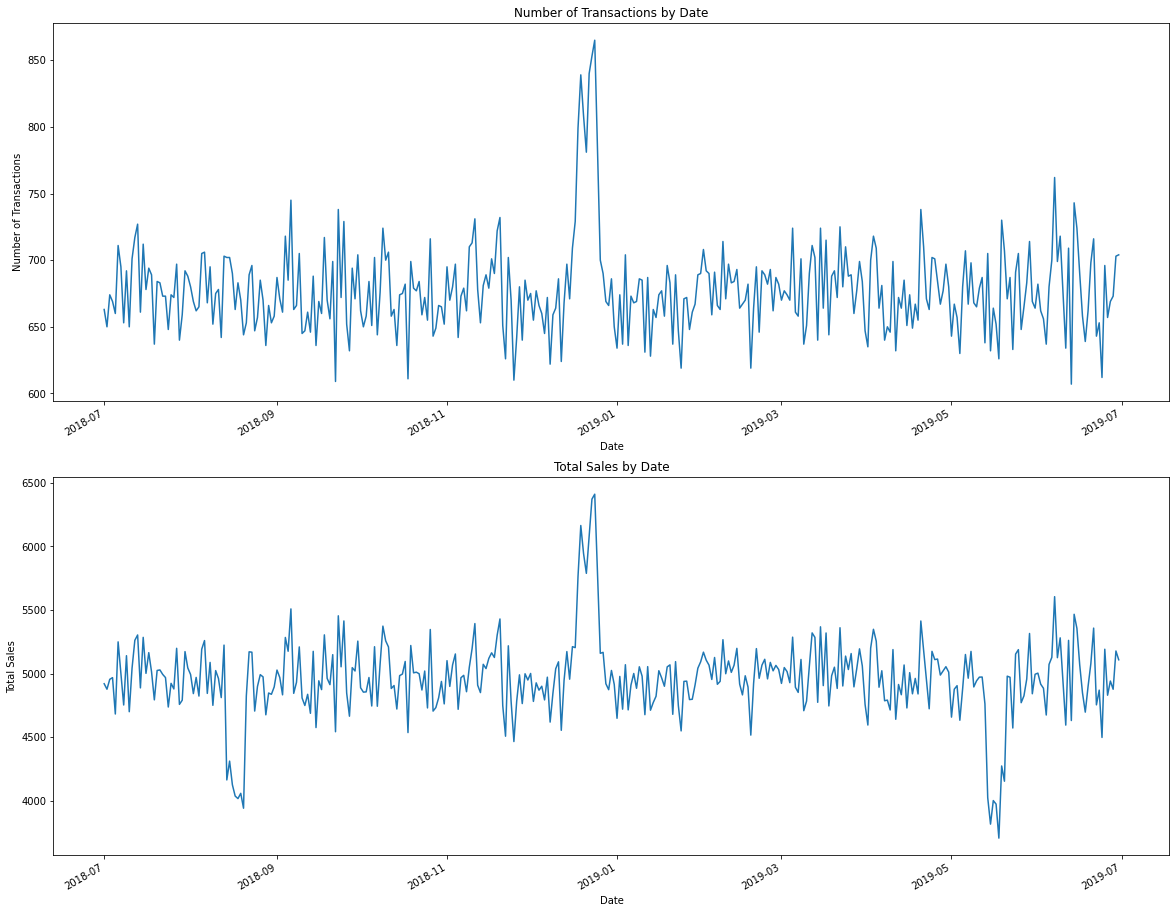

In [432]:
fig, ax = plt.subplots(2,1,figsize=(20, 17))

# create a plot depicting the number of transactions over time
data.DATE.value_counts().sort_index().plot(ax=ax[0], xlabel='Date', ylabel='Number of Transactions', title='Number of Transactions by Date')

# create a plot depicting the total spending of customers over time
data.groupby('DATE')['TOT_SALES'].sum().plot(ax=ax[1], xlabel='Date', ylabel='Total Sales', title='Total Sales by Date')

plt.show()